![picture](https://drive.google.com/uc?id=1t85VSkuEnCm-X8egDjib0GMTGZT0LM3c)

# LangChain
Preparado por Jonathan Vásquez para EvoAcademy

#Preparación

Primero instalamos las librerías necesarias para este tutorial y configuramos el API Key de OpenAI.

In [ ]:
%pip install langchain

In [ ]:
%pip install openai

Luego necesita generar la API Key de OpenAI e importarla como variable en nuestro ambiente.

In [ ]:
import config
import os
os.environ['OPENAI_API_KEY'] = config.OPENAI_API_KEY


# Introduccion a LangChain
Conceptos básicos de LangChain:
- Model
- Prompt Templates
- Chain

Estos tres interactúan de la siguiente manera:
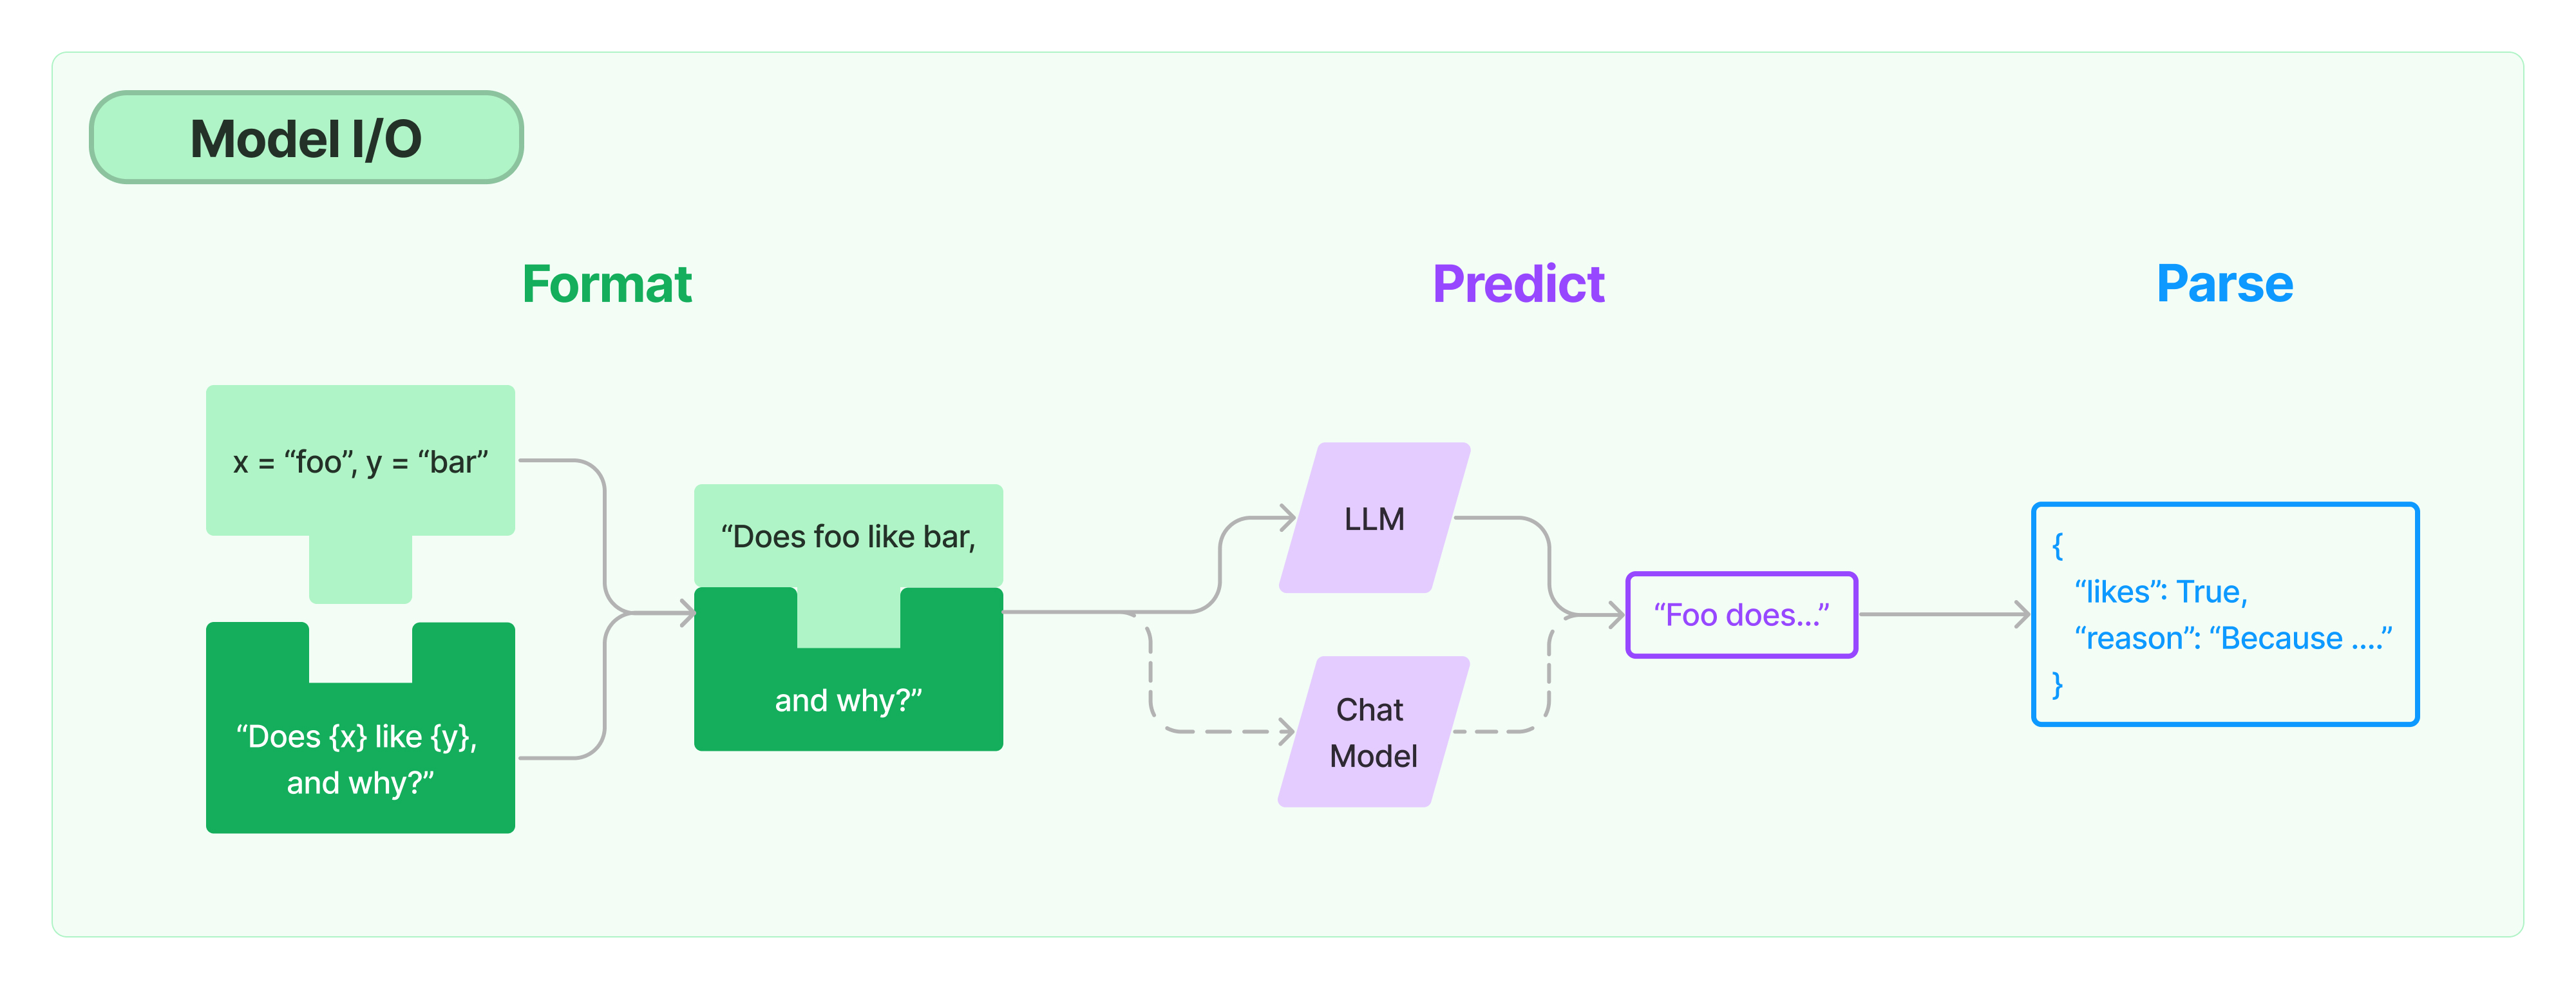
Fuente: langchain.com

##  Modelos

Hay dos tipos de modelos de lenguajes con LangChain:
 - LLM: modelo de lenguaje que recibe `string` y entrega de vuelta un `string`.
 - ChatModels: modelo de lenguaje que es capaz de recibir un lista de mensajes de chats y retorna un mensaje de chat.

Listas de modelos que LangChain soporte:
- [Lista de LLM](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.llms)
- [Lista de ChatModels](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.chat_models)

### LLMs
Usaremos los modelos de `OpenAI`.

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI()

# llm_ada = OpenAI(model_name='text-ada-001')
# llm_rand = OpenAI(temperature=1.0)
# llm_det = OpenAI(top_p=1)

Los parámetros son atributos del `llm`. Para verificar aquellos por defecto, puedes imprimirlos:

In [ ]:
print(llm.model_name)
print(llm.temperature)
print(llm.top_p)

Para entregarle un texto al model y que este entregue otro devuelta, debes puedes usar el método `predict()` y entregar como argument el texto. Por ejemplo, podemos pedirle que nos cuente un chiste, o bien que nos diga quien es el presidente de chile.

Nota: también puedes el modelo sin llamar ningún método y entregarle el texto directamente. Por ejemplo, por medio de `llm('Cuentame un chiste.')`. Esto es similar (pero no técnicamente igual) a `llm.predict('Cuentame un chiste.')`.

In [ ]:
print('Ejemplo 1')
print(llm.predict('Cuéntame un chiste.'))
print()
print('Ejemplo 2')
print(llm('Al que madruga ', max_tokens=6))
print()
print('Ejemplo 3')
print(llm('Quién es el presidente de Chile?'))

Recordar que los modelos de OpenAI están entrenados con información de hasta septiembre 2021.

LangChain también nos permite generar un "lote" de predicciones. Para hacerlo debemos usar el siguiente código:

In [ ]:
textos = ['Caracol que se duerme...',
            'Al que madruga...',]

llm_result = llm.generate(textos)

In [ ]:
llm_result.generations

In [ ]:
llm_result

Todo esta generación de texto está asociado a la cantidad de tokens que le entregamos y los que usa para completar. Podemos tener un control de este número a través del atributo `llm_result.llm_output`.

In [ ]:
llm_result.llm_output

### ChatModels
Los ChatModels reciben como input una `lista` de mensajes y devuelve uno. Cada mensaje se define por dos características:
- `content`: el contenido del mensaje.
- `role`: el rol de la entidad que está emitiendo el mensaje.

Existen al menos tres tipos de roles: humano, asistente IA, y sistema.
- usuario: el usuario que interactúa con el asistente.
- asistente IA: asistente IA que responde a los mensajes enviados por el humano.
- sistema: el sistema es quien define ciertas reglas que define el comportamiento de la IA.

Para los mensajes tenemos dos opciones: (1) usar clase base ChatMessage, (2) o usar las clases bases que ya tienen asignado un rol.

In [ ]:
from langchain.schema.messages import ChatMessage

chat_history = [
        ChatMessage(role='system',
                content='Eres un asistente virtual de viajes. Tu objetivo \
                        es ayudar a los usuarios a planificar sus viajes.')
        ,
        ChatMessage(role='assistant',
                content='Hola, soy tu asistente virtual de viajes. \
                        ¿Qué tipo de viaje te gustaría hacer?')
        ,
        ChatMessage(role='user',
                content='Quiero viajar a españa. \
                        Qué ciudades sugieres visitar?')
]

In [ ]:
from langchain.schema import HumanMessage, AIMessage, SystemMessage

chat_history = [
        SystemMessage(content='Eres un asistente virtual de viajes. Tu objetivo \
                        es ayudar a los usuarios a planificar sus viajes.'),

        AIMessage(content='Hola, soy tu asistente virtual de viajes. \
                        ¿Qué tipo de viaje te gustaría hacer?'),

        HumanMessage(content='Quiero viajar a españa. \
                        Qué ciudades sugieres visitar?')
]

Usando estas opciones, podemos crear un `ChatModels` de la siguente forma:

In [ ]:
from langchain.chat_models import ChatOpenAI

chat_model = ChatOpenAI()

# chat_model = ChatOpenAI(model_name = 'gpt-3.5-turbo',
#                         temperature = 0.9)

In [ ]:
print(chat_model.model_name)
print(chat_model.temperature)

Usando la lista de mensajes `chat_history`, podemos pedirle a `chat_model` que genere un mensaje. Aquí tenemos una diferencia con LLM. Primero, podemos recibir de vuelta un mensaje de vuelta por medio del uso directo por medio del método `__call__`.

Es importante destacar que al hacerlo de esta manera, debemos sí o sí entregarle una `lista` de mensajes.

In [ ]:
res = chat_model(chat_history)
res

La segunda opción es usar `predict` o `predict_messages`.

La primera opción lo podemos usar solametne si le entregamos el contenido del mensaje (un `string`), y asume que es enviado por un usuario. Al usar esta forma, vamos a recibir de vuelta un `string` también.


Por otro lado, la segunda la podemos utilizar cuando tenemos una lista de mensajes. En este caso, recibiremos de vuelta un mensaje.

In [ ]:
res = chat_model.predict('Quiero viajar a españa. \
                        Qué ciudades sugieres visitar?')
print(res)

In [ ]:
type(res)

str

In [ ]:
res = chat_model.predict_messages(chat_history)
res

Notar que para ambos modelos, podemos también pasar parámetros para ir modificando la generación del texto o mensaje en el método `predict` o `predict_messages`.

In [ ]:
res = chat_model.predict_messages(chat_history, temperature=1.0)
res
print(res.content)

En resumen, `LLM` son modelos que reciben y entregan textos. Por otro lado los `ChatModels` son modelos de lenguajes que funcionan bajo un contexto de chat. Reciben un historial de conversación, y en base a ese contexto, entrega de vuelta un mensaje. Generalmente, los segundos son más complejos y más usados que los primeros.

## Plantillas de Prompts


Las plantillas se utilizan para generar los avisos para cada pregunta. La plantilla es una cadena que puede contener marcadores de posición (`{}`), que se reemplazarán con otros textos.



In [ ]:
from langchain import PromptTemplate

template = """
Quiero que actúes como asesor experto de nombres para nuevos restaurantes.

Devuelve una lista de nombres de restaurantes. Cada nombre debe ser corto, atractivo\
y fácil de recordar. Debe relacionarse con la DESCRIPCION de restaurante.

¿Cuáles son algunos buenos nombres para un restaurante según la siguiente DESCRIPCION?
```
{descripcion_restaurante}
```

Lista de Nombres:
"""

# prompt = PromptTemplate(
#     input_variables=['descripcion_restaurante'],
#     template=template
# )

prompt = PromptTemplate.from_template(template)

In [ ]:
prompt.input_variables

['descripcion_restaurante']

In [ ]:
print(prompt.format(descripcion_restaurante='vende comida italiana'))

Un template puede tener más de una variable. Por ejemplo, podemos agregar el país en el template.

In [ ]:
template = """
Quiero que actúes como asesor experto de nombres para nuevos restaurantes en {lugar}.

Devuelve una lista de nombres de restaurantes. Cada nombre debe ser corto, atractivo\
y fácil de recordar. Debe relacionarse la DESCRIPCION del restaurante.

¿Cuáles son algunos buenos nombres para un restaurante según la siguiente DESCRIPCION?
```
{descripcion_restaurante}
```

Lista de Nombres:
"""

# prompt = PromptTemplate(
#     input_variables=['lugar','descripcion_restaurante'],
#     template=template
# )

prompt = PromptTemplate.from_template(template)

Podemos verificar cuales son las variables del template por medio del siguiente código:

In [ ]:
prompt.input_variables

['descripcion_restaurante', 'lugar']

Ejemplo:

In [ ]:
print(prompt.format(lugar='Chile',
                    descripcion_restaurante='Venta de empanadas y vino tinto Chileno'))

También podemos hacer templates para los `ChatMessage`. Primero debemos usar el `ChatPromptTemplate` que recibe una lista de mensajes, cada uno con los atributos `content` y `role`. También se pueden usar los templates asignado para cada rol.

In [ ]:
from langchain.prompts.chat import (
            ChatPromptTemplate,
            SystemMessagePromptTemplate,
            HumanMessagePromptTemplate,
            AIMessagePromptTemplate
)

# template = ChatPromptTemplate(
#     input_variables = ['nombre_IA', 'destino'],
#     messages=[
#         SystemMessagePromptTemplate.from_template('Eres un robot para asistencia de pasajes de vuelos. Tu nombre es {nombre_IA}'),
#         AIMessagePromptTemplate.from_template('Hola! Mi nombre es {nombre_IA}, A dónde deseas volar?'),
#         HumanMessagePromptTemplate.from_template('Hola, me gustaria que me ayudes para comprar un pasaje para volar a {destino}'),
#     ]
# )

template = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate.from_template('Eres un robot para asistencia de pasajes de vuelos. Tu nombre es {nombre_IA}'),
        AIMessagePromptTemplate.from_template('Hola! Mi nombre es {nombre_IA}, A dónde deseas volar?'),
        HumanMessagePromptTemplate.from_template('Hola, me gustaria que me ayudes para comprar un pasaje para volar a {destino}'),
    ]
)

In [ ]:
template.messages

In [ ]:
print(template.format(nombre_IA='Raul', destino='Francia'))

## Chain

`Chain` es una interfaz que nos ayudará a encadenar aplicaciones. Un `Chain` es una secuencia de llamadas a componentes, tales como un `llm`, 'ChatModel', un tempalte, y otro `Chain`.

In [ ]:
from langchain import PromptTemplate

template = """
Actúa como asesor experto de nombres para empresas ubicadas en {lugar}.

Devuelve una lista de entre 3 a 5 nombres de empresas. Cada nombre debe ser corto, muy atractivo, \
fácil de recordar, y pegajoso. Debe relacionarse con la DESCRIPCION y el lugar.

¿Cuáles son algunos buenos nombres para una empresa con la siguiente DESCRIPCION?
```
{descripcion}
```

Lista de Nombres:
"""

prompt_template = PromptTemplate.from_template(template)

llm = OpenAI()


In [ ]:
prompt_template

In [ ]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm,
                prompt=prompt_template,
                verbose=True)


In [ ]:
print(chain.run(lugar='Puerto Varas, Chile',
            descripcion='Empresa que vende juegos de mesa.'))

# Síguenos para más
Si te gustó este contenido síguenos en nuestras redes sociales:


*   [LinkedIn](https://www.linkedin.com/company/evoacdm)
*   [YouTube](https://www.linkedin.com/company/evoacdm)
*   [TikTok](https://tiktok.com/@evoacdm/)
*   [Instagram](https://www.instagram.com/evoacdm/)
*   [Website](http://www.evoacademy.cl)